# Ejemplo para el cálculo de costes de construccion en el alcance de estudios soluciones clase I (Estrategia protectora avance en paralelo): Parte 1 - Lectura de los datos de entrada de la forma en planta.

## Importación de paquetes de IPython

In [1]:
# hidden
import environment as env
env.initialize()

In [2]:
# Python 2/3 setup 
from __future__ import (absolute_import, division, print_function, unicode_literals)
# from builtins import *

In [3]:
# Juypyter setup

%matplotlib inline
import os
import sys
from IPython.display import HTML

## Importación de paquetes para el ejemplo

In [4]:
import logging
import os
import pickle

from construccion.datos_entrada import datos_entrada_planta

from construccion.main_tramos import simulacion_proceso_constructivo_tramo

from construccion.representacion_v2 import representacion_resultados_tiempo
from construccion.representacion import representacion_resultados_costes

from construccion.calculos import calculo_costes
from construccion.calculos import calculo_longitudes_volumenes_acumulados
from construccion.calculos import extraccion_resultados

from construccion.simulacion_estudio_previo import simulacion_estudio_previo

from construccion.utils_notebook import lectura_fichero_entrada


## Datos de entrada de la forma en planta

### RUTA DE DIRECTORIOS DE DATOS DE ENTRADA Y SALIDA


In [5]:
# Ruta con los datos de entrada
ruta_de = os.path.join(env.input_path, 'construccion', 'estudio_soluciones_clase1')
# Ruta con los datos de salida
ruta_ds = os.path.join(env.output_path, 'construccion', 'estudio_soluciones_clase1')

### INTRODUCCION

De acuerdo con el documento del articulado de la ROM 1.1., en el alcance de estudio de soluciones se deben analizar los procesos y medios construcctivos, sus condicionantes y estimar los plazos de ejecución. Además se deben evaluar los costes más probables de construcción considerando estrategias simples de construcción. Para ella será necesario analizar la interacción de la obra con las condiciones climáticas propagadas a cada uno de los tramos del dique.

En este alcance (estudio de soluciones clase I) esta herramienta permite verificar el proceso construcctivo del dique mediante simulación numérica. Durante esta simulación la herramienta permite obtener los tiempos y costes de construcción en función de la tipología, dimensiones, rendimiento de los trabajos, medios constructivos y estrategia de avance

### DEFINICIÓN DEL ALCANCE Y ESTRATEGIA

Se define en el ejemplo que el alcance es el de estudio de soluciones de clase I. En este alcance, la herramienta considera que los daños sufridos en cada estado son reparados de manera inmediata en el estado siguiente. Y finalmente se considera una estrategia de avance en paralelo en la que todas las subfases avanzan al mismo tiempo protegiendose unas a otra con sus avances. Sin embargo, se obliga a que el avance de una subfase nunca pueda ser superior al de las subfases siguientes.

En este alcance se pueden verificar tres tipos de estrategias:
- Avance en serie: En dónde cada subafse comienza en el momento en el que finaliza la subfase anterior. Esta estrategia es la que maximiza el tiempo de ejecución y las pérdidas puesto que las subfases están expuestas ante las inclemencias climáticas.
- Avance en paralelo: En dónde todas las subfases comienzan a la vez y por lo tanto se produce un avance en paralelo. Esta estrategia es la que minimiza el tiempo de ejecución y las pérdidas puesto que cada subfase se protege con el avance de las siguientes.
- Cronograma de los trabajos: En dónde se define mediante un cronograma de los trabajos el inicio y el final teórico de cada una de las subfases constructivas. Este cronograma se introduce en la herramienta mediante una matriz en la que el eje X representa cada una de las subfases del tramo y el eje Y las horas desde la hora 0 de inicio de la obra

In [6]:
alcance = 'EA'
estrategia = 'avance_paralelo'
rep_inmediata = 'si'

### RUTA PARA LA CREACIÓN DEL FICHERO DE LOG

In [7]:
direct = os.path.join(ruta_ds, 'debug_info.log')
logging.basicConfig(filename=direct, level=logging.INFO)

### DEFINICIÓN DE LA TIPOLOGÍA Y FORMA EN PLANTA

En este ejemplo se propone analizar el coste de un dique de tipo mixto con berma baja de protección (Tipo C, LMB). La sección tipo del dique a analizar se muestra en la figura. En este ejemplo, se considera para la forma en planta un dique compuesto por una única alineación principal de 500 m de longitud. El calado de la alineación principal es de 16 m respecto al nivel medio del mar, la altura de la berma es de 4 m y los cajones tienen una altura de 18 m por 12 m de ancho.

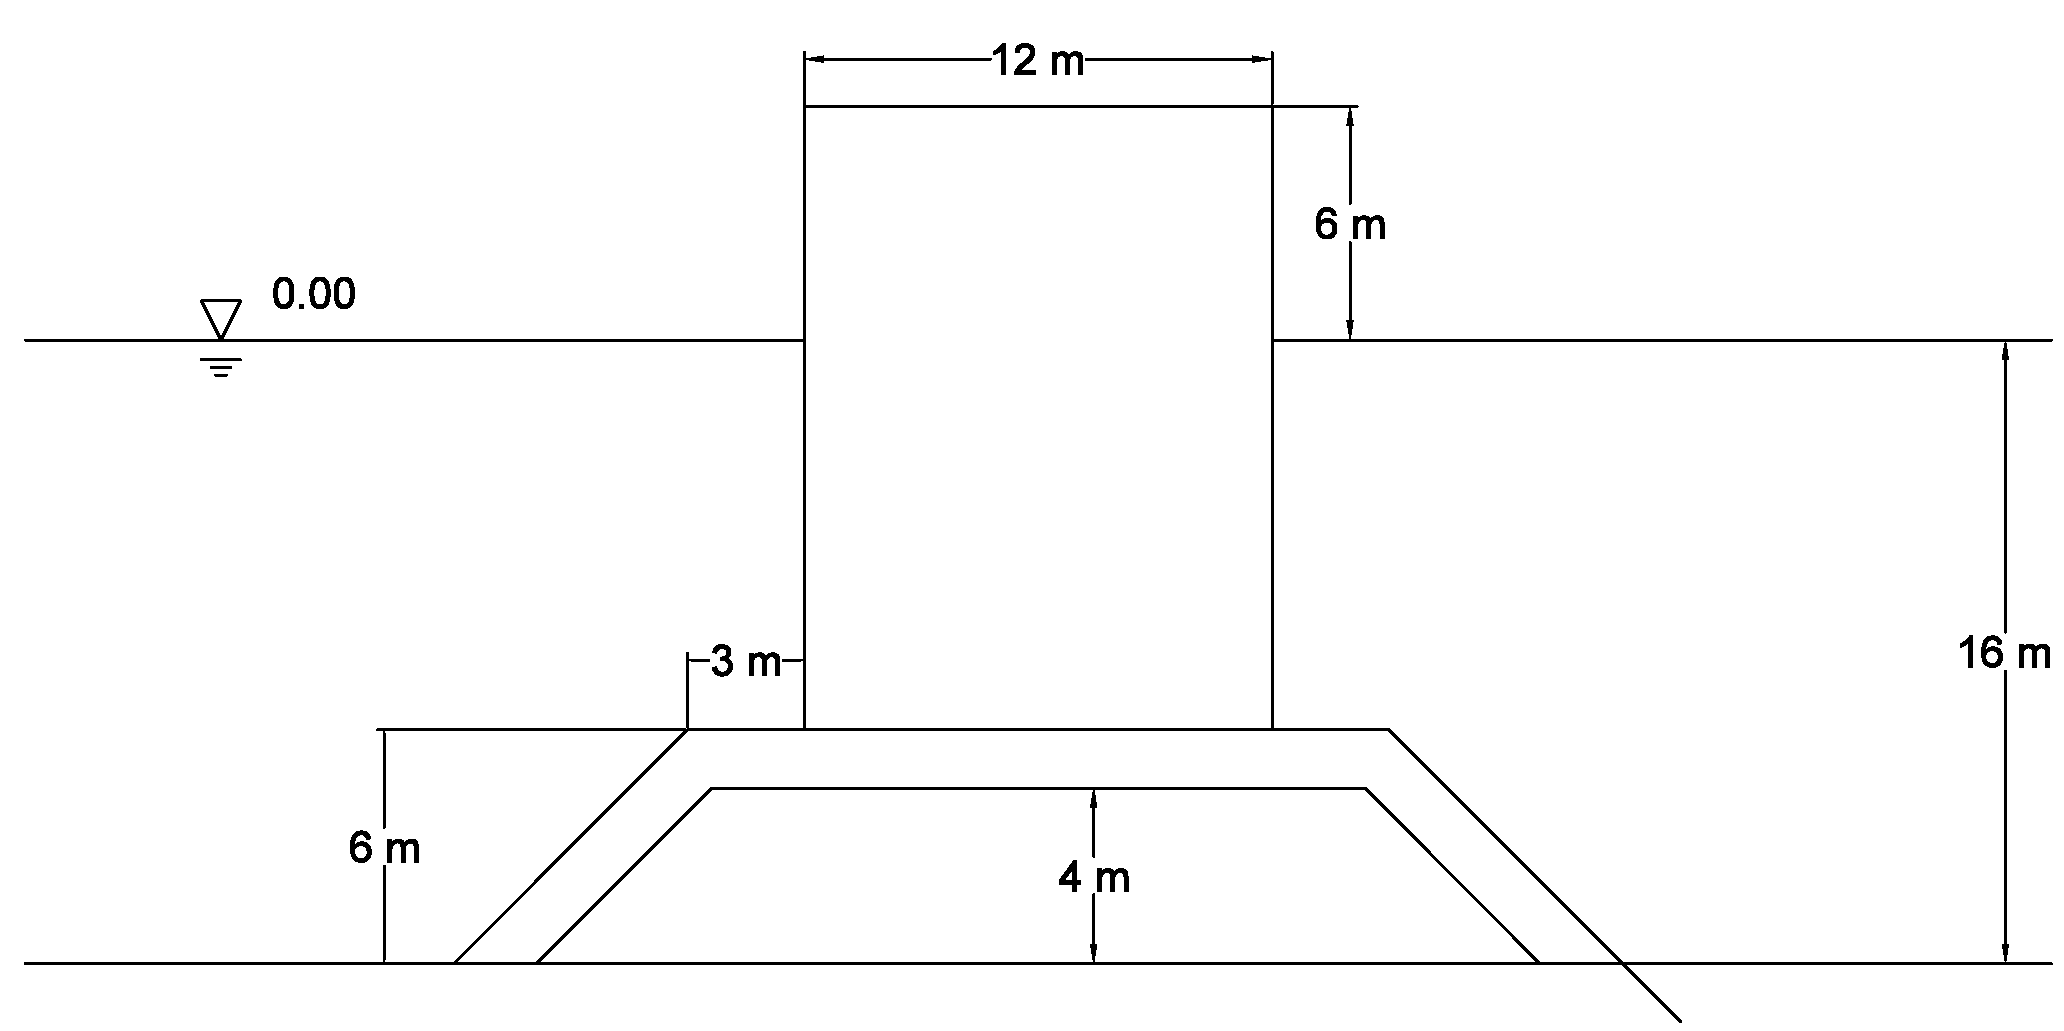

In [8]:
from IPython.display import Image
img_name = os.path.join(ruta_de, 'imagenes', 'esquema_dique_c.png')
Image(filename=img_name, width=800)

#### Lectura de los ficheros con los datos de entrada de tipología y forma en planta
(Para modificar los datos utilizados en el ejemplo se deben modificar los ficheros de la carpeta de inputs)

In [13]:
# Lectura de los datos de entrada de la planta
(de_planta, p_invernal) = datos_entrada_planta(ruta_de, alcance, estrategia)

display(de_planta)


longitud tipologia  calado
T_0     500.0   'mixto'    16.0

#### Cálculo del numero de tramos del dique
En función del fichero de forma en planta introducido

In [10]:
# Calculo del numero de tramos del dique
n_tramos = de_planta.shape[0]
n_tramos

1

#### Inicialización de las horas de inicio para la verificación del proceso constructivo

In [11]:
# Inicializacion de la variable hora que avanza con cada iteracion
hora_acumulada = 0

# Inicializacion de la hora de inicio del tramo 0
hora_inicio_tramos = [0]

#### Guardado de variables

In [12]:
# Saving the objects:
dir_data = os.path.join(env.data_path, 'construccion', 'estudio_soluciones_clase1', 'var_co_costes_construccion_01_es_c1.pkl')

with open(dir_data, 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([n_tramos, de_planta, hora_acumulada, hora_inicio_tramos, 
                 p_invernal, alcance, estrategia, ruta_de, ruta_ds, rep_inmediata], f)

Continuar con [Parte 2 - Lectura de los datos de entrada asociados a la descripción del proceso constructivo.](co_costes_construccion_02_es_c1.ipynb).
